# Градиентный бустинг

##### 1. Считайте таблицу с признаками из файла features.csv с помощью кода, приведенного выше. Удалите признаки, связанные с итогами матча (они помечены в описании данных как отсутствующие в тестовой выборке).

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('features.csv', index_col = 'match_id')
df.drop(['duration', 'tower_status_radiant', 'tower_status_dire', 'barracks_status_radiant', 'barracks_status_dire']
           , axis=1, inplace=True)

##### 2. Проверьте выборку на наличие пропусков с помощью функции count(), которая для каждого столбца показывает число заполненных значений. Много ли пропусков в данных? Запишите названия признаков, имеющих пропуски, и попробуйте для любых двух из них дать обоснование, почему их значения могут быть пропущены.

In [2]:
a = []
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))
    if round(pct_missing*100) > 0:
        a.append(col)

match_id - 0%
start_time - 0%
lobby_type - 0%
r1_hero - 0%
r1_level - 0%
r1_xp - 0%
r1_gold - 0%
r1_lh - 0%
r1_kills - 0%
r1_deaths - 0%
r1_items - 0%
r2_hero - 0%
r2_level - 0%
r2_xp - 0%
r2_gold - 0%
r2_lh - 0%
r2_kills - 0%
r2_deaths - 0%
r2_items - 0%
r3_hero - 0%
r3_level - 0%
r3_xp - 0%
r3_gold - 0%
r3_lh - 0%
r3_kills - 0%
r3_deaths - 0%
r3_items - 0%
r4_hero - 0%
r4_level - 0%
r4_xp - 0%
r4_gold - 0%
r4_lh - 0%
r4_kills - 0%
r4_deaths - 0%
r4_items - 0%
r5_hero - 0%
r5_level - 0%
r5_xp - 0%
r5_gold - 0%
r5_lh - 0%
r5_kills - 0%
r5_deaths - 0%
r5_items - 0%
d1_hero - 0%
d1_level - 0%
d1_xp - 0%
d1_gold - 0%
d1_lh - 0%
d1_kills - 0%
d1_deaths - 0%
d1_items - 0%
d2_hero - 0%
d2_level - 0%
d2_xp - 0%
d2_gold - 0%
d2_lh - 0%
d2_kills - 0%
d2_deaths - 0%
d2_items - 0%
d3_hero - 0%
d3_level - 0%
d3_xp - 0%
d3_gold - 0%
d3_lh - 0%
d3_kills - 0%
d3_deaths - 0%
d3_items - 0%
d4_hero - 0%
d4_level - 0%
d4_xp - 0%
d4_gold - 0%
d4_lh - 0%
d4_kills - 0%
d4_deaths - 0%
d4_items - 0%
d5_hero -

In [3]:
a

['first_blood_time',
 'first_blood_team',
 'first_blood_player1',
 'first_blood_player2',
 'radiant_bottle_time',
 'radiant_courier_time',
 'radiant_flying_courier_time',
 'radiant_first_ward_time',
 'dire_bottle_time',
 'dire_courier_time',
 'dire_flying_courier_time',
 'dire_first_ward_time']

### first_blood_player1 (игроки причастные к событию first_blood) - в 20% случаев первой крови нет в первые 5 минут игры
### first_blood_time (игровое время первой крови) - в 20% случаев первой крови нет в первые 5 минут игры

##### 3. Замените пропуски на нули с помощью функции fillna(). На самом деле этот способ является предпочтительным для логистической регрессии, поскольку он позволит пропущенному значению не вносить никакого вклада в предсказание. Для деревьев часто лучшим вариантом оказывается замена пропуска на очень большое или очень маленькое значение — в этом случае при построении разбиения вершины можно будет отправить объекты с пропусками в отдельную ветвь дерева. Также есть и другие подходы — например, замена пропуска на среднее значение признака. Мы не требуем этого в задании, но при желании попробуйте разные подходы к обработке пропусков и сравните их между собой.

In [4]:
df.fillna(0, inplace = True)

##### 4. Какой столбец содержит целевую переменную? Запишите его название.

In [5]:
df['radiant_win']

0        1
1        1
2        0
3        0
4        0
        ..
97225    0
97226    1
97227    0
97228    0
97229    1
Name: radiant_win, Length: 97230, dtype: int64

##### Забудем, что в выборке есть категориальные признаки, и попробуем обучить градиентный бустинг над деревьями на имеющейся матрице "объекты-признаки". Зафиксируйте генератор разбиений для кросс-валидации по 5 блокам (KFold), не забудьте перемешать при этом выборку (shuffle=True), поскольку данные в таблице отсортированы по времени, и без перемешивания можно столкнуться с нежелательными эффектами при оценивании качества. Оцените качество градиентного бустинга (GradientBoostingClassifier) с помощью данной кросс-валидации, попробуйте при этом разное количество деревьев (как минимум протестируйте следующие значения для количества деревьев: 10, 20, 30). Долго ли настраивались классификаторы? Достигнут ли оптимум на испытанных значениях параметра n_estimators, или же качество, скорее всего, продолжит расти при дальнейшем его увеличении?

tree: 5, score: 0.6353574331143763
tree: 10, score: 0.6648506879750012
tree: 15, score: 0.6762504876906534
time:0:02:42.645202
tree: 30, score: 0.6900064710388155
tree: 50, score: 0.6974943609466162
tree: 100, score: 0.7062341833296908
tree: 150, score: 0.7103706760549959


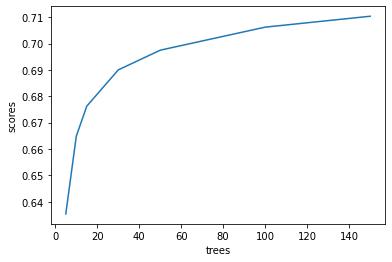

In [9]:
import datetime
from sklearn.model_selection import KFold
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold, cross_val_score
import matplotlib.pyplot as plot

X_train = df.drop('radiant_win',axis = 1)
y_train = df.radiant_win
# Разделение выборки для кроссвалидации
cv = KFold(n_splits = 5,shuffle = True,random_state = 42)
# Кол-ва деревьев для модели
number_of_trees = [5,10,15,30,50,100,150]

# Список для записи результатов
scores = []

for tree in number_of_trees:
    model = GradientBoostingClassifier(n_estimators=tree, random_state=42)
    if tree == 30:
        start_time = datetime.datetime.now()
    model_scores = cross_val_score(model,X_train,y_train,cv = cv,scoring = 'roc_auc')
    if tree == 30:
        finish_time = datetime.datetime.now()
        print(f'time:{finish_time-start_time}')
    print(f'tree: {tree}, score: {np.mean(model_scores)}')
    scores.append(np.mean(model_scores))
plot.plot(number_of_trees, scores)
plot.xlabel('trees')
plot.ylabel('scores')
plot.show()    

### Кросс-валидация для градиентного бустинга с 30 деревьями заняла 0:02:42.645202. Показатель AUC-ROC равен 0.69

### Есть смысл использовать больше 30 деревьев, так как метрика увеличится. Для ускорения обучения можно уменьшить глубину деревьев (параметр max_depth)

# Логистическая регрессия(2 задание)

##### 1. Оцените качество логистической регрессии (sklearn.linear_model.LogisticRegression с L2-регуляризацией) с помощью кросс-валидации по той же схеме, которая использовалась для градиентного бустинга. Подберите при этом лучший параметр регуляризации (C). Какое наилучшее качество у вас получилось? Как оно соотносится с качеством градиентного бустинга? Чем вы можете объяснить эту разницу? Быстрее ли работает логистическая регрессия по сравнению с градиентным бустингом?

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('features.csv', index_col = 'match_id')
df.drop(['duration', 'tower_status_radiant', 'tower_status_dire', 'barracks_status_radiant', 'barracks_status_dire']
           , axis=1, inplace=True)
df.fillna(0, inplace = True)

In [2]:
from sklearn.preprocessing import StandardScaler

cat_cols = ['r1_hero', 'r2_hero', 'r3_hero', 'r4_hero', 'r5_hero',
                      'd1_hero', 'd2_hero', 'd3_hero', 'd4_hero', 'd5_hero','lobby_type']
columns_to_scale = df.columns.difference(['radiant_win', 'start_time'] + cat_cols)

data = df[columns_to_scale].values
scaler = StandardScaler()
data = scaler.fit_transform(data)
for i, column in enumerate(columns_to_scale):
    df[column] = data[:, i]

In [3]:
columns_to_matrix = df.columns.difference(['radiant_win', 'start_time'])
x = df[columns_to_matrix].values
y = np.ravel(df['radiant_win'].values)

In [4]:
x

array([[-0.56456187, -0.33765018,  4.        , ..., -0.51455507,
        -0.53204608, -0.98748588],
       [-0.56456187,  0.50746532, 39.        , ..., -0.51455507,
        -0.53204608, -0.98748588],
       [ 1.07617075,  1.91018279, 22.        , ..., -0.51455507,
        -0.53204608,  0.39120271],
       ...,
       [ 1.07617075, -0.70575461, 28.        , ..., -0.51455507,
         1.93273572,  1.7698913 ],
       [-0.56456187,  0.60112502, 59.        , ...,  1.55447532,
         0.70034482, -0.98748588],
       [ 1.07617075, -1.07603717, 99.        , ..., -0.51455507,
         1.93273572, -0.98748588]])

C:1e-05


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

[0.69342056 0.69364399 0.69499467 0.69416031 0.69578412]
0.6944007308154861
Time spent:  0:00:07.956699
C:0.0001


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

[0.70969928 0.70987078 0.71122227 0.71138146 0.71333999]
0.7111027553665816
Time spent:  0:00:09.278223
C:0.001


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

[0.71416547 0.71461707 0.71553508 0.71619703 0.71789698]
0.7156823274829807
Time spent:  0:00:07.904572
C:0.01


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

[0.71444153 0.71544647 0.71528307 0.71591098 0.71829259]
0.7158749274978009
Time spent:  0:00:10.127936
C:0.1


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

[0.71408695 0.71523989 0.71547752 0.71564855 0.71842205]
0.7157749916020593
Time spent:  0:00:12.694351
C:1.0


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

[0.71409561 0.71534228 0.71520906 0.7159858  0.71766454]
0.7156594592360933
Time spent:  0:00:12.706639
C:10.0


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

[0.71370923 0.71538024 0.71524358 0.71609191 0.71803543]
0.7156920800766996
Time spent:  0:00:09.276903
C:100.0


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

[0.71411915 0.71536514 0.71525057 0.71581334 0.71815516]
0.7157406717369925
Time spent:  0:00:07.352783
C:1000.0


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

[0.7140216  0.71473592 0.71549371 0.71582509 0.71798976]
0.7156132158301501
Time spent:  0:00:10.320649


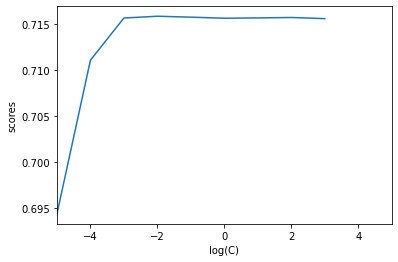

In [5]:
import datetime
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold, cross_val_score
import matplotlib.pyplot as plot

cv = KFold(random_state = 42,shuffle = True,n_splits = 5)
C_range = [10.0 ** i for i in range(-5,4)]
scores = []
dic = {}
for C in C_range:
    print(f'C:{C}')
    start_time = datetime.datetime.now()
    model = LogisticRegression(random_state = 42, C = C)
    m_scores = cross_val_score(model,x,y,cv=cv,scoring = 'roc_auc')
    print(m_scores)
    print(np.mean(m_scores))
    scores.append(np.mean(m_scores))
    dic[C] = np.mean(m_scores)
    print('Time spent: ', datetime.datetime.now() - start_time)
plot.plot(range(-5,4), scores)
plot.xlim([-5,5])
plot.xlabel('log(C)')
plot.ylabel('scores')
plot.show()

In [6]:
Maximum = max(scores)
Max_index = scores.index(Maximum)
print('C: ', C_range[Max_index], 'score: ', Maximum)

C:  0.01 score:  0.7158749274978009


### Логистическая регрессия показывает высокое качество сравнимое с градиентным бустингом на числе дервьев более 150. При этом скорость обучения существенно выше.Как видно из графика, параметр регуляризации С в данном случае не оказывает существенного влияния на качество логистической регрессии. Наилучшее качество получается при C = 0.01: score = 0.71

##### Среди признаков в выборке есть категориальные, которые мы использовали как числовые, что вряд ли является хорошей идеей. Категориальных признаков в этой задаче одиннадцать: lobby_type и r1_hero, r2_hero, ..., r5_hero, d1_hero, d2_hero, ..., d5_hero. Уберите их из выборки, и проведите кросс-валидацию для логистической регрессии на новой выборке с подбором лучшего параметра регуляризации. Изменилось ли качество? Чем вы можете это объяснить?

In [7]:
df_cat = df.copy(deep = True)
for column in cat_cols:
    df_cat.drop(column, axis = 1, inplace = True)

In [8]:
columns_to_matrix = df_cat.columns.difference(['radiant_win', 'start_time'])
x = df_cat[columns_to_matrix].values
y = np.ravel(df_cat['radiant_win'].values)

C:1e-05
[0.69301387 0.69465216 0.69551243 0.69511775 0.69699207]
0.6950576560892063
Time spent:  0:00:00.985572
C:0.0001
[0.70930795 0.71020952 0.71145151 0.71161087 0.71347496]
0.7112109619025709
Time spent:  0:00:01.465916
C:0.001
[0.71435149 0.71564491 0.71597718 0.71679757 0.71850493]
0.7162552164598966
Time spent:  0:00:02.784353
C:0.01
[0.71453373 0.71602584 0.71591485 0.7171979  0.71854101]
0.7164426665509407
Time spent:  0:00:04.783996
C:0.1
[0.71449545 0.71602294 0.71585036 0.71722205 0.71849013]
0.7164161872428171
Time spent:  0:00:05.369532
C:1.0
[0.71449262 0.71602493 0.71584322 0.71722159 0.71848324]
0.7164131196659719
Time spent:  0:00:05.531808
C:10.0
[0.71449346 0.71602268 0.71584286 0.71722201 0.71848252]
0.7164127045446538
Time spent:  0:00:06.151504
C:100.0
[0.7144934  0.71602276 0.71584162 0.7172218  0.71848213]
0.7164123423202085
Time spent:  0:00:06.563218
C:1000.0
[0.71449343 0.71602282 0.71584208 0.71722183 0.71848211]
0.7164124545832699
Time spent:  0:00:07.151

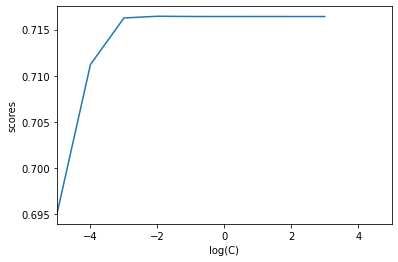

In [9]:
cv = KFold(random_state = 42,shuffle = True,n_splits = 5)
C_range = [10.0 ** i for i in range(-5,4)]
scores = []
dic = {}
for C in C_range:
    print(f'C:{C}')
    start_time = datetime.datetime.now()
    model = LogisticRegression(random_state = 42, C = C)
    m_scores = cross_val_score(model,x,y,cv=cv,scoring = 'roc_auc')
    print(m_scores)
    print(np.mean(m_scores))
    scores.append(np.mean(m_scores))
    dic[C] = np.mean(m_scores)
    print('Time spent: ', datetime.datetime.now() - start_time)
plot.plot(range(-5,4), scores)
plot.xlim([-5,5])
plot.xlabel('log(C)')
plot.ylabel('scores')
plot.show()

In [10]:
Maximum = max(scores)
Max_index = scores.index(Maximum)
print('C: ', C_range[Max_index], 'score: ', Maximum)

C:  0.01 score:  0.7164426665509407


### После удаления категориальных признаков качество практически не изменилось, значит они не имеют существенного значения для качества модели. Лучшее качество по-прежнему достигается при C = 0.01.

##### 3. На предыдущем шаге мы исключили из выборки признаки rM_hero и dM_hero, которые показывают, какие именно герои играли за каждую команду. Это важные признаки — герои имеют разные характеристики, и некоторые из них выигрывают чаще, чем другие. Выясните из данных, сколько различных идентификаторов героев существует в данной игре (вам может пригодиться фукнция unique или value_counts).

In [11]:
df = pd.read_csv('features.csv', index_col = 'match_id')

In [12]:
len(df['r1_hero'].unique())

108

### Ответ: 108 героев 

##### 4. Воспользуемся подходом "мешок слов" для кодирования информации о героях. Пусть всего в игре имеет N различных героев. Сформируем N признаков, при этом i-й будет равен нулю, если i-й герой не участвовал в матче; единице, если i-й герой играл за команду Radiant; минус единице, если i-й герой играл за команду Dire. Ниже вы можете найти код, который выполняет данной преобразование. Добавьте полученные признаки к числовым, которые вы использовали во втором пункте данного этапа. 

In [13]:
N = np.max(df['r1_hero'].unique())
x_pick = np.zeros((df.shape[0], N))

for i, match_id in enumerate(df.index):
    for p in range(5):
        x_pick[i, df.loc[match_id, 'r%d_hero' % (p+1)] - 1] = 1
        x_pick[i, df.loc[match_id, 'd%d_hero' % (p+1)] - 1] = -1

In [14]:
for i in range(N):
    df_cat[f"Hero{i}"] = x_pick[:, i]

In [15]:
df_cat

,start_time,r1_level,r1_xp,r1_gold,r1_lh,r1_kills,r1_deaths,r1_items,r2_level,r2_xp,...,Hero102,Hero103,Hero104,Hero105,Hero106,Hero107,Hero108,Hero109,Hero110,Hero111
match_id,,,,,,,,,,,,,,,,,,,,,
0,1430198770,1.400808,1.525972,0.734957,0.969743,-0.537757,-0.578083,-0.509023,-0.332256,-0.625222,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1430220345,0.501314,-0.080139,-0.247570,-0.246859,-0.537757,1.017574,1.492930,0.578881,0.732454,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1430227081,0.501314,0.151070,0.263085,1.190944,-0.537757,-0.578083,1.492930,-0.332256,0.224676,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1430263531,0.501314,0.962950,-0.198013,0.306142,-0.537757,-0.578083,-1.309804,-1.243393,-1.170813,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1430282290,0.501314,0.348745,-0.124754,-0.357459,0.968527,-0.578083,-0.108632,-1.243393,-1.008757,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114402,1450265551,0.501314,0.834109,0.107949,0.637942,-0.537757,1.017574,-0.108632,-1.243393,-1.032165,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
114403,1450277704,0.501314,0.987660,0.577666,0.637942,-0.537757,1.017574,-1.309804,-0.332256,-0.765671,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
114404,1450291848,0.501314,0.292267,-1.309820,-1.131661,-0.537757,-0.578083,-1.309804,0.578881,0.465961,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


##### 5. Проведите кросс-валидацию для логистической регрессии на новой выборке с подбором лучшего параметра регуляризации. Какое получилось качество? Улучшилось ли оно? Чем вы можете это объяснить? 

In [16]:
columns_to_matrix = df_cat.columns.difference(['radiant_win', 'start_time'])
x = df_cat[columns_to_matrix].values
y = np.ravel(df_cat['radiant_win'].values)

C:1e-05
[0.6971637  0.69870468 0.69941729 0.69933021 0.70105335]
0.6991338465796227
Time spent:  0:00:02.350581
C:0.0001
[0.72349462 0.72388376 0.72443309 0.72590142 0.72688314]
0.7249192065428395
Time spent:  0:00:03.317501
C:0.001
[0.74459048 0.74649847 0.74382531 0.74874274 0.74731728]
0.7461948588492856
Time spent:  0:00:05.294726
C:0.01
[0.74934494 0.7526165  0.74892569 0.75541298 0.75171252]
0.751602525763204
Time spent:  0:00:10.513308
C:0.1


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

[0.74930604 0.75295995 0.74916293 0.7559794  0.75156506]
0.7517946776009428
Time spent:  0:00:14.533733
C:1.0


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

[0.74923872 0.75297578 0.74915371 0.7560201  0.75148766]
0.7517751934428405
Time spent:  0:00:12.701445
C:10.0


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

[0.74923321 0.75297971 0.74915028 0.75602304 0.75147879]
0.7517730067969944
Time spent:  0:00:15.073897
C:100.0


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

[0.74923283 0.75297904 0.7491519  0.75602177 0.75148115]
0.7517733372442599
Time spent:  0:00:14.854222
C:1000.0


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

[0.74923389 0.75297947 0.74915242 0.75602048 0.75147932]
0.7517731169422126
Time spent:  0:00:15.035967


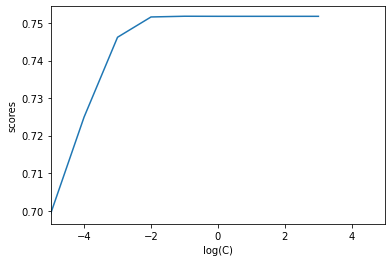

In [17]:
cv = KFold(random_state = 42,shuffle = True,n_splits = 5)
C_range = [10.0 ** i for i in range(-5,4)]
scores = []
dic = {}
for C in C_range:
    print(f'C:{C}')
    start_time = datetime.datetime.now()
    model = LogisticRegression(random_state = 42, C = C)
    m_scores = cross_val_score(model,x,y,cv=cv,scoring = 'roc_auc')
    print(m_scores)
    print(np.mean(m_scores))
    scores.append(np.mean(m_scores))
    dic[C] = np.mean(m_scores)
    print('Time spent: ', datetime.datetime.now() - start_time)
plot.plot(range(-5,4), scores)
plot.xlim([-5,5])
plot.xlabel('log(C)')
plot.ylabel('scores')
plot.show()

In [18]:
Maximum = max(scores)
Max_index = scores.index(Maximum)
print('C: ', C_range[Max_index], 'score: ', Maximum)

C:  0.1 score:  0.7517946776009428


### Качество обучения существенно вoзросло. В данном случае лучший параметр C = 0.1. Это можно объяснить тем, что само значение идентификатора мало влияло на результат, значительно важнее был просто факт присутствия героя в игре

##### 6. Постройте предсказания вероятностей победы команды Radiant для тестовой выборки с помощью лучшей из изученных моделей (лучшей с точки зрения AUC-ROC на кросс-валидации). Убедитесь, что предсказанные вероятности адекватные — находятся на отрезке [0, 1], не совпадают между собой (т.е. что модель не получилась константной).

### Применим логистическую регрессию

In [19]:
lr = LogisticRegression(C = 0.1)
lr.fit(x, y)

/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=0.1)

In [20]:
df = pd.read_csv('features_test.csv', index_col = 'match_id')

df.fillna(0, inplace = True)

data = df[columns_to_scale].values
data = scaler.transform(data)
for i, column in enumerate(columns_to_scale):
    df[column] = data[:, i]
        
x_pick = np.zeros((df.shape[0], N))
for i, match_id in enumerate(df.index):
    for p in range(5):
        x_pick[i, df.loc[match_id, 'r%d_hero' % (p+1)] - 1] = 1
        x_pick[i, df.loc[match_id, 'd%d_hero' % (p+1)] - 1] = -1
for i in range(N):
    df[f"Hero{i}"] = x_pick[:, i]
    
for column in cat_cols:
    df.drop(column, axis = 1, inplace = True)

In [21]:
df = df.drop('start_time',axis=1)

In [22]:
proba = lr.predict_proba(df.values)

In [23]:
proba[:,0].max()

0.9998142760025925

In [24]:
proba[:,0].min()

6.173804109055325e-07

In [25]:
proba[:,1].max()

0.9999993826195891

In [26]:
proba[:,1].min()

0.00018572399740745356

In [27]:
len(proba[:,1])

17177

In [28]:
len(proba[:,0])

17177

### Видно, что результаты адекватные 